In [ ]:
## 🛠️ Setup & Imports
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / 'src'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from solar_eda import load_raw, SolarCleaner, SolarEDA
# === 0. Setup ===
COUNTRY = "benin"  # change this per country
df = load_raw(f"../data/raw/{COUNTRY}.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

<Axes: title={'center': 'Raw Data - Value Distribution'}, ylabel='Count'>

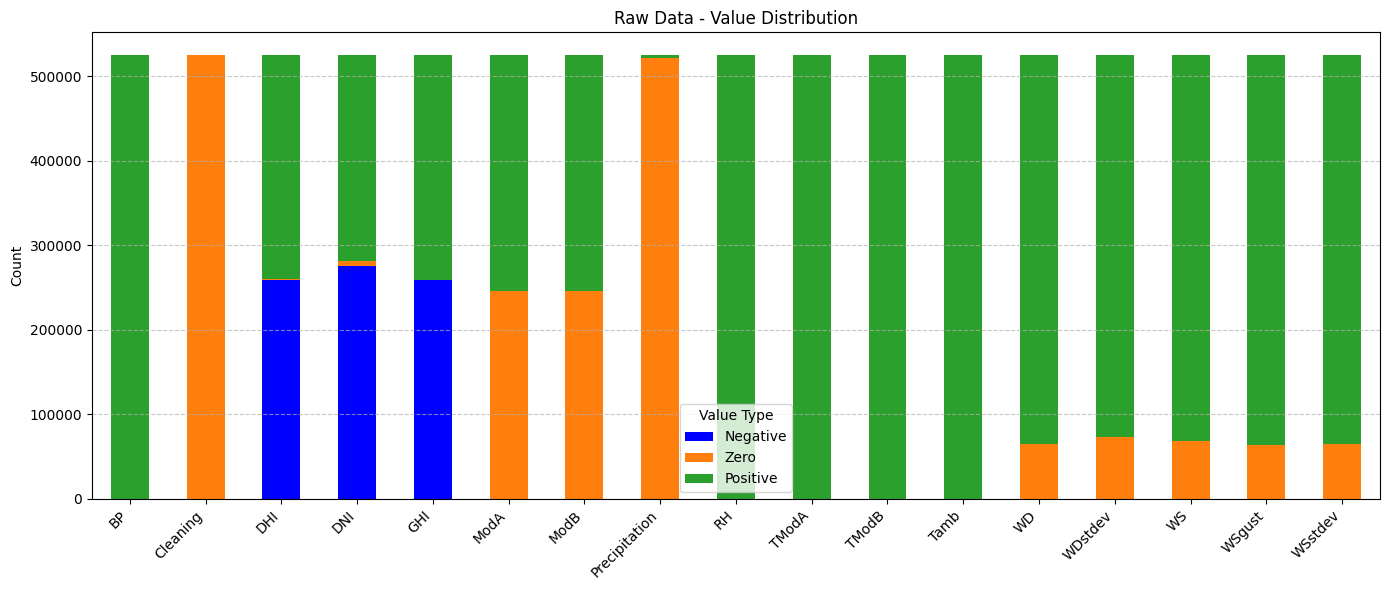

In [ ]:
## 📊 1. Data Profiling
df.info()
df.describe().T  # Summary stats
SolarEDA.missing_table(df, mv_thresh=0.05)  # >5% missing
SolarEDA.dtype_summary(df)
SolarCleaner.plot_value_distribution_summary(df, title="Raw Data - Value Distribution")

In [ ]:
## 🧹 2. Cleaning Pipeline
cleaner = SolarCleaner()
df_clean = cleaner.clean(df)
df_clean.to_csv(f"../data/{COUNTRY}_clean.csv", index=False)

Dropping columns: ['Comments']


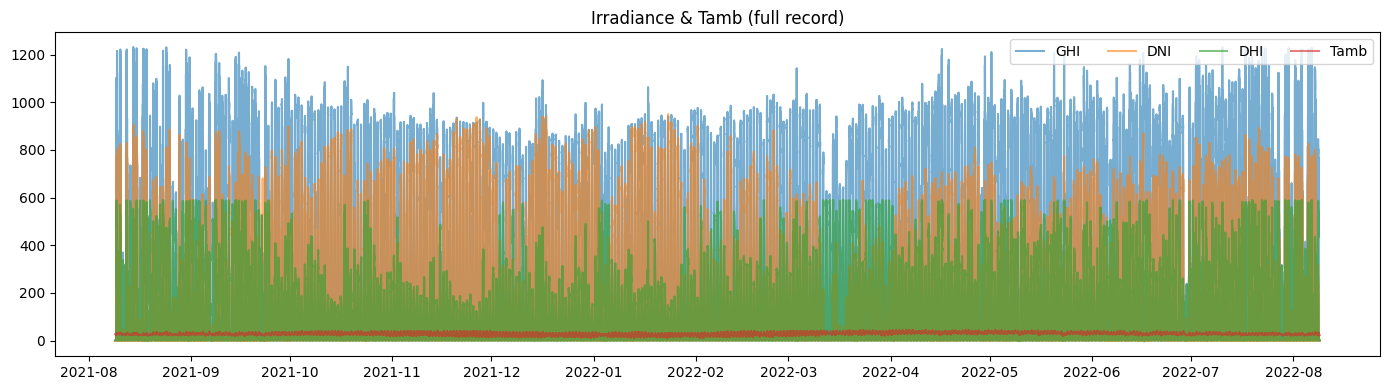

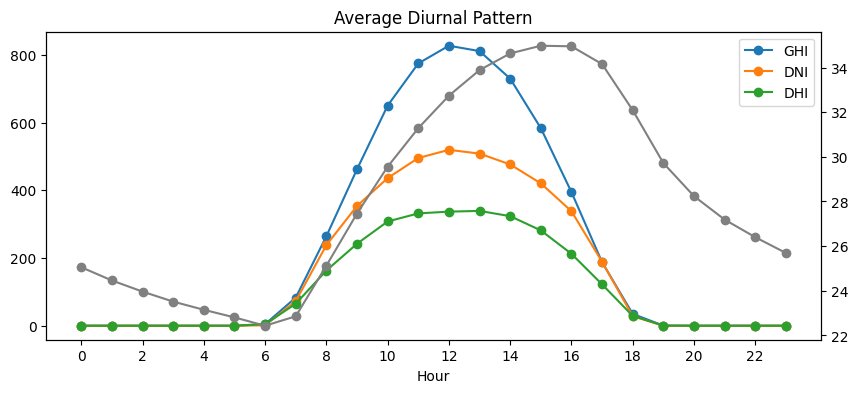

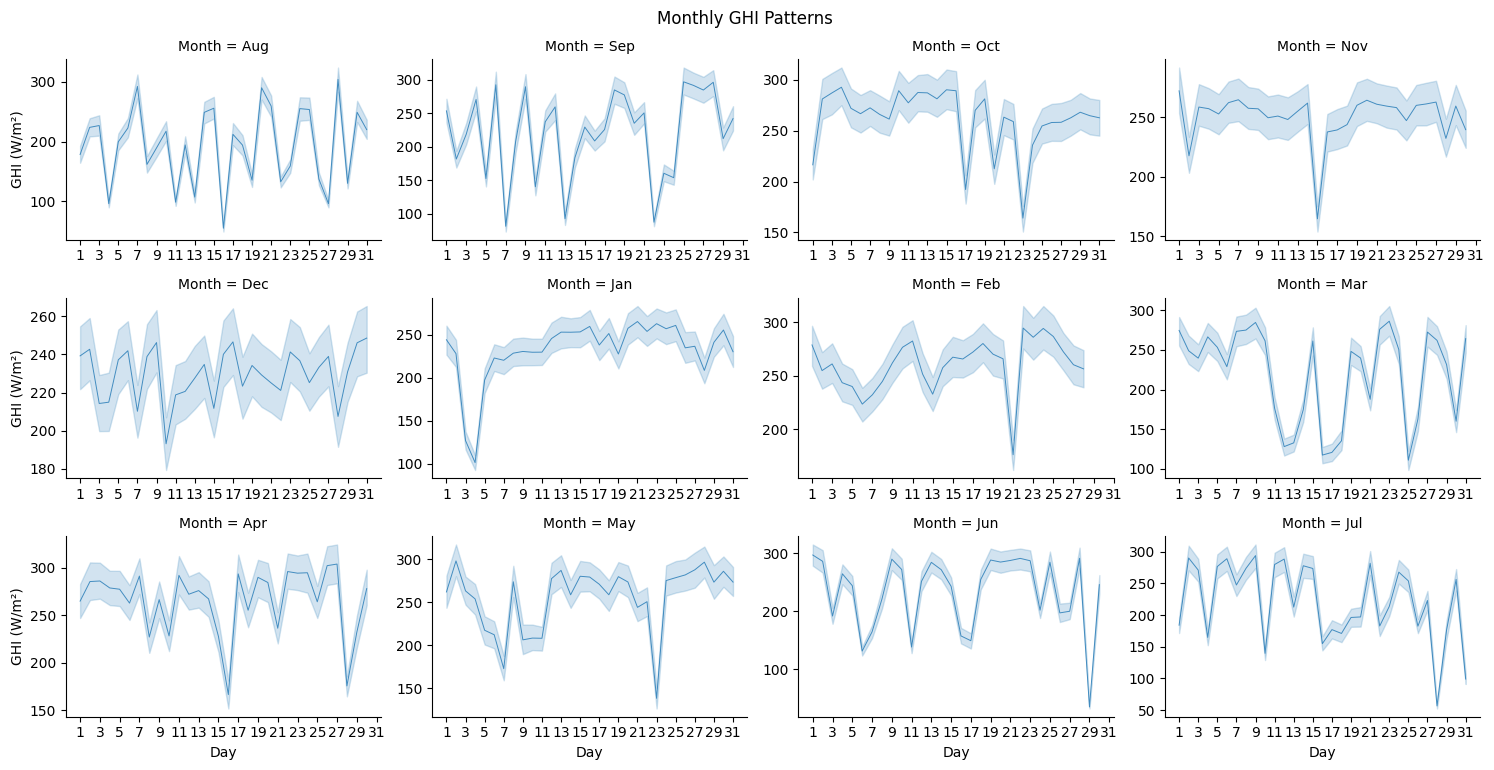

In [ ]:
## 📈 3. Time Series Analysis
SolarEDA.line_overview(df_clean)
SolarEDA.diurnal_curve(df_clean)
SolarEDA.monthly_facets(df_clean)

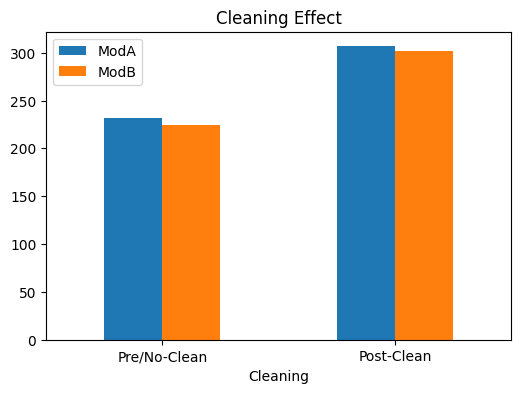

In [ ]:
## 🧼 4. Cleaning Impact
if 'Cleaning' in df_clean.columns:
    SolarEDA.cleaning_impact(df_clean)

<Axes: title={'center': 'Correlation Matrix'}>

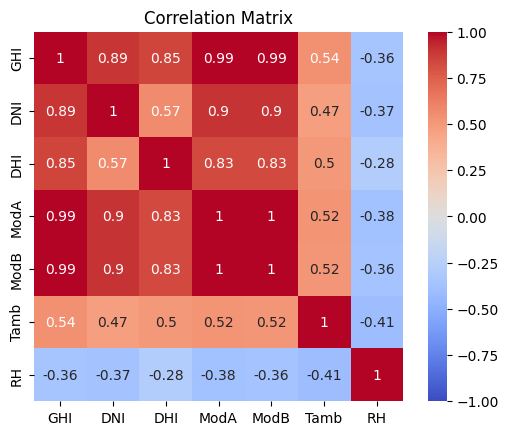

In [ ]:
## 🔗 5. Correlation & Relationships
engineered_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH']
SolarEDA.corr_heatmap(df_clean, engineered_cols, only_engineered=False)

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'WS'}>]],
      dtype=object)

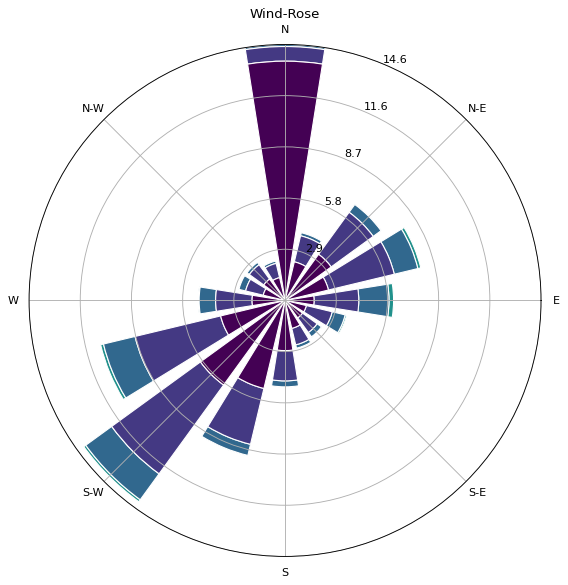

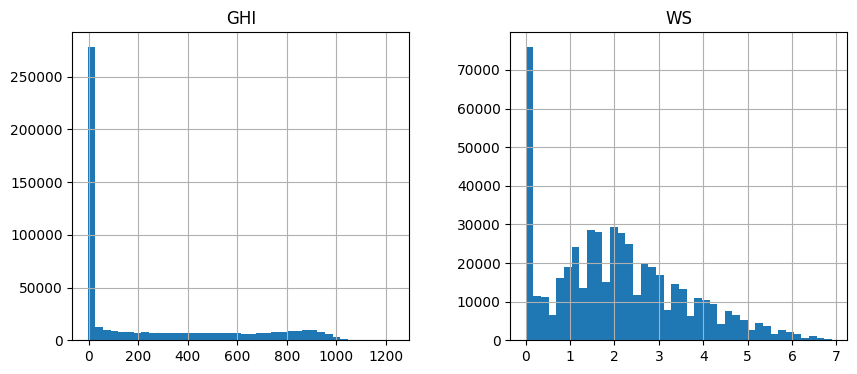

In [ ]:
## 💨 6. Wind & Distribution
SolarEDA.wind_rose(df_clean)
df_clean[['GHI', 'WS']].hist(figsize=(10,4), bins=40)

<Axes: xlabel='RH', ylabel='GHI'>

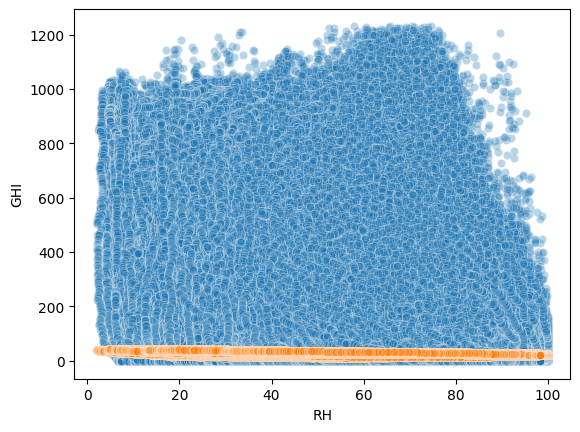

In [ ]:
## 🌡️ 7. Temperature & Humidity Interactions
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.3)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.3)

<Axes: title={'center': 'Bubble Chart – GHI vs Tamb (bubble = RH)'}, xlabel='GHI (W/m²)', ylabel='Tamb (°C)'>

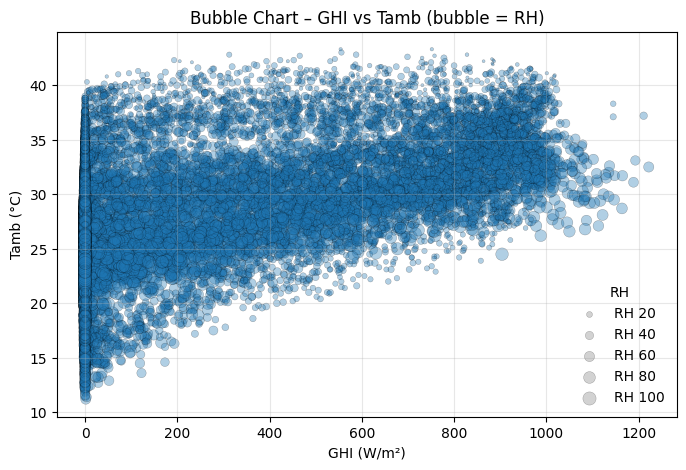

In [ ]:
## 🔵 8. Bubble Chart: GHI vs Temperature
SolarEDA.bubble_ghi_tamb(df_clean)

<Axes: title={'center': 'Cleaned Data - Value Distribution'}, ylabel='Count'>

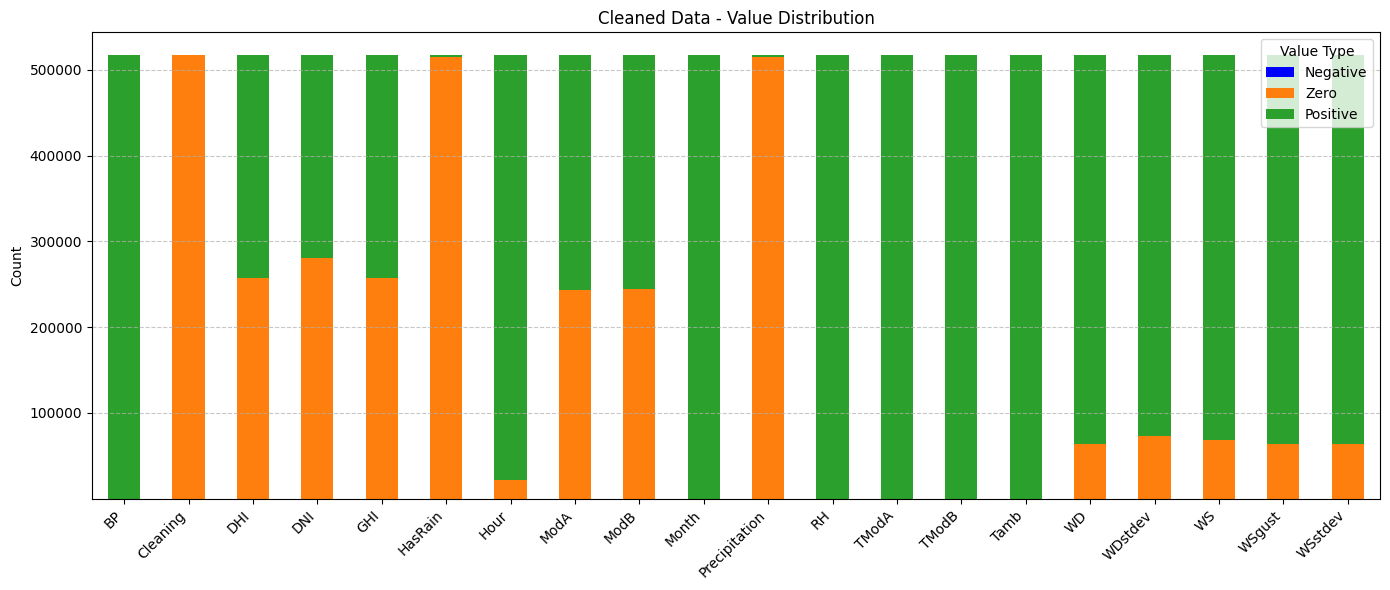

In [ ]:
## 🧮 9. Value Distribution After Cleaning
SolarCleaner.plot_value_distribution_summary(df_clean, title="Cleaned Data - Value Distribution")

In [ ]:
## 💾 10. Save Cleaned Data
df_clean.to_csv(f"../data/{COUNTRY}_clean.csv", index=False)
print(f"Cleaned data saved for {COUNTRY}.")

Cleaned data saved for benin.
